# NASA Min-MeteorologicalYear 

Calculates two-week minimum DNI to create a Minimum TMY 

Uses NASA data files for ~20 years

In [1]:
import pvlib
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [7]:
SAMfile = r'../DATA/WeatherFilesNASA/POWER_Point_Hourly_20160101_20161231_090d00S_000d00E_LT.csv'

In [9]:
with open(SAMfile) as myfile:
    head = next(myfile)#
    meta = next(myfile)

meta2=meta.split(',')
meta2[-1] = meta2[-1][:-1] # Remove the carryover sig

head2 = head.split(',')
head2[-1] = head2[-1][:-1] 

res = {head2[i]: meta2[i] for i in range(len(head2))}


data = pd.read_csv(SAMfile, skiprows=2)

metadata = {}
metadata['TZ'] = float(res['Time Zone'])
metadata['latitude'] = float(res['Latitude'])
metadata['longitude'] = float(res['Longitude'])
metadata['altitude'] = float(res['Elevation'])
metadata['city'] = res['Source']

if 'Minute' in data.columns:
    dtidx = pd.to_datetime(
        data[['year', 'month', 'day', 'hour', 'minute']])
else: 
    dtidx = pd.to_datetime(
        data[['year', 'month', 'day', 'hour']])
# in USA all timezones are integers
tz = 'Etc/GMT%+d' % -metadata['TZ']
data.index = pd.DatetimeIndex(dtidx).tz_localize(tz)


In [10]:
data

,year,month,day,hour,ghi,dni,dhi,tdry,twet,Tdew,wspd,wdir,rh,pres,snow,albedo,aod
2016-01-01 00:00:00+14:00,2016,1,1,0,478.156,1077.961,65.156,-30.611,-30.931,-31.244,3.108,53.793,93.375,684.896,NaN,0.750,0.0
2016-01-01 01:00:00+14:00,2016,1,1,1,478.016,1081.078,64.609,-30.541,-30.892,-31.244,2.999,49.755,92.625,684.658,NaN,0.750,0.0
2016-01-01 02:00:00+14:00,2016,1,1,2,478.055,1082.734,64.078,-30.470,-30.861,-31.252,2.917,45.651,91.938,684.413,NaN,0.750,0.0
2016-01-01 03:00:00+14:00,2016,1,1,3,480.219,1100.500,58.773,-30.392,-30.822,-31.252,2.884,41.376,91.188,684.158,NaN,0.750,0.0
2016-01-01 04:00:00+14:00,2016,1,1,4,482.266,1100.438,59.469,-30.298,-30.767,-31.236,2.884,36.963,90.438,683.894,NaN,0.750,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2016-12-31 19:00:00+14:00,2016,12,31,19,416.984,377.141,268.742,-22.572,-22.830,-23.087,3.686,19.049,94.938,691.938,NaN,0.781,0.0
2016-12-31 20:00:00+14:00,2016,12,31,20,424.328,452.688,247.602,-22.603,-22.869,-23.134,3.896,14.399,94.812,692.032,NaN,0.766,0.0
2016-12-31 21:00:00+14:00,2016,12,31,21,394.664,291.984,281.430,-22.650,-22.955,-23.259,4.184,9.673,94.062,692.106,NaN,0.789,0.0
2016-12-31 22:00:00+14:00,2016,12,31,22,414.211,451.219,240.266,-22.736,-23.080,-23.423,4.441,6.262,93.312,692.194,NaN,0.766,0.0


In [12]:
metadata

{'TZ': 14.0,
 'latitude': -90.0,
 'longitude': 0.0,
 'altitude': 2811.04,
 'city': 'NASA/POWER'}

In [13]:
import pvlib

In [57]:
#SP = pvlib.location.Location(latitude = -89.98, longitude = -24.8, tz = 'Etc/GMT+3', altitude = 2810, name='SouthPole')
SP = pvlib.location.Location(latitude = metadata['latitude'], longitude = metadata['longitude'], tz = metadata['TZ'], 
                             altitude = metadata['altitude'], name='SouthPole')

In [32]:
sun = SP.get_solarposition(data.index)
data['Solar_Azimuth'] = sun['azimuth']
data['Solar_Elevation'] = sun['elevation']

In [58]:
SP = SP.get_clearsky(data.index)
data['dni_clearsky'] = SP.dni
data['dhi_clearsky'] = SP.dhi
data['ghi_clearsky'] = SP.ghi

In [27]:
import matplotlib.pyplot as plt

In [61]:
foo = data[data['Solar_Elevation']>0]

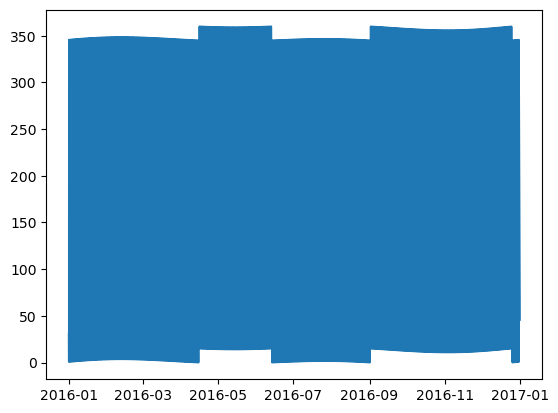

In [62]:
plt.plot(data['Solar_Azimuth'])

In [63]:
NS = foo[(foo['Solar_Azimuth'] < 90) | (foo['Solar_Azimuth'] > 270)]
EW = foo[(foo['Solar_Azimuth'] >= 90) & (foo['Solar_Azimuth'] <= 270)]

In [71]:
NS.dni.sum()/EW.dni.sum()

0.9602075933337336

In [72]:
NS.dni_clearsky.sum()/EW.dni_clearsky.sum()

0.9990813880192589